# Statistiek voor psychologen, deel 1
# Oefeningen uit cursus - beschrijvende statistiek

- gebaseerd op cursus "Statistiek voor psychologen, deel 1" van I. Van Mechelen (academiejaar 2019-2020)
- voor formularia en meer oefeningen: zie <https://statistiek.vhsven.be>

Dit document is een [Jupyter notebook](https://jupyter.org/) o.b.v. Python (zie ook [*Programming for Psychologists*](https://onderwijsaanbod.kuleuven.be/2019/syllabi/e/P0M58AE.htm)). Je kan het bekijken als een combinatie van Word en Excel: je kan er (wiskundige) tekst in typen, en je kan er tegelijk ook berekeningen mee uitvoeren. Voor *Statistiek voor psychologen, deel 3* wordt een gelijkaardige tool gebruikt. Voor de meeste lezers zal de code zelf minder interessant zijn, dus focus vooral op de uitkomsten en de bijhorende tekst.

In [1]:
1+1

2

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/vhsven/kul-psy-stat1-oefcursus/HEAD?filepath=stat1-beschrijvend.ipynb)

## Setting the mood...

![math train](./math-train.jpg)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy
from sympy.core import sympify
%matplotlib inline
# pd.set_option('precision', 4)
pd.options.display.float_format = '{:.4f}'.format

![xkcd-2400](https://imgs.xkcd.com/comics/statistics.png)

## Appendix 3A

- $n=30$ observaties (rijen)
- variabelen (kolommen)
  - plaats: kwalitatief ($m=3$)
  - anderen: kwantitatief
  - angst: kwantitatief

In [2]:
df = pd.read_csv('appendix-3a.csv', sep=',', index_col='volgnummer')
df['plaats'].astype('category', copy=False)
df

,plaats,anderen,angst
volgnummer,,,
1,thuis,3,16
2,werk,1,12
3,werk,5,32
4,thuis,0,24
5,thuis,1,15
6,buitenshuis,0,15
7,thuis,2,29
8,thuis,3,3
9,werk,7,36


In [3]:
# met sympy worden breuken en wortels niet automatisch uitgerekend
sdf = df.copy()
sdf['anderen'] = sympify(df['anderen'].values)
sdf['angst'] = sympify(df['angst'].values)

In [4]:
def samenvatting(df, kolom, kwadraten=False):
    freq = df[kolom].value_counts(sort=False).sort_index().rename('freq').to_frame()
    if pd.api.types.is_numeric_dtype(df[kolom].dtype) and kwadraten:
        freq.insert(0, '$X^2$', freq.index.values ** 2) 
    cfreq = df[kolom].value_counts(sort=False).sort_index().cumsum().rename('cfreq')
    p = df[kolom].value_counts(sort=False, normalize=True).sort_index().rename('p')
    F = df[kolom].value_counts(sort=False, normalize=True).sort_index().cumsum().rename('F')
    result = pd.concat([freq, cfreq, p, F], axis=1)
    result.index.name = '$X$'
    return result

## Appendix 4

> 1) schrijf uit: $\sum_{k=3}^6 \sum_{j=k-1}^5 (2b_{k,j} + 3)$

- 10 combinaties

| $k$ | $j$ | $2b_{k,j} + 3$ |
|-----|-----|----------------|
| $3$ | $2$ | $2b_{3,2} + 3$ |
| $3$ | $3$ | $2b_{3,3} + 3$ |
| $3$ | $4$ | $2b_{3,4} + 3$ |
| $3$ | $5$ | $2b_{3,5} + 3$ |
| $4$ | $3$ | $2b_{4,3} + 3$ |
| $4$ | $4$ | $2b_{4,4} + 3$ |
| $4$ | $5$ | $2b_{4,5} + 3$ |
| $5$ | $4$ | $2b_{5,4} + 3$ |
| $5$ | $5$ | $2b_{5,5} + 3$ |
| $6$ | $5$ | $2b_{6,5} + 3$ |

- $\sum_{k=3}^6 \sum_{j=k-1}^5 (2b_{k,j} + 3)$
- $= 2\sum_{k=3}^6 \sum_{j=k-1}^5 b_{k,j} + \sum_{k=3}^6 \sum_{j=k-1}^5 3$
- $= 2\sum_{k=3}^6 \sum_{j=k-1}^5 b_{k,j} + 10 \cdot 3$
- $= 2\sum_{k=3}^6 (b_{k,k-1} + \ldots + b_{k,5}) + 30$
- $= 2[(b_{3,3-1} + \ldots + b_{3,5}) + \ldots + (b_{6,6-1} + \ldots + b_{6,5})] + 30$
- $= 2[(b_{3,2} + \ldots + b_{3,5}) + \ldots + (b_{6,5} + \ldots + b_{6,5})] + 30$
- $= 2[(b_{3,2} + b_{3,3} + b_{3,4} + b_{3,5}) + (b_{4,3} + b_{4,4} + b_{4,5}) + (b_{5,4} + b_{5,5}) + (b_{6,5})] + 30$
- $= 2[b_{3,2} + b_{3,3} + b_{3,4} + b_{3,5} + b_{4,3} + b_{4,4} + b_{4,5} + b_{5,4} + b_{5,5} + b_{6,5}] + 30$

> 2) maak voor jezelf alle bovenstaande eigenschappen intuitief aannemelijk door bepaalde waarden voor $n$ en $m$ in te vullen en uit te schrijven

  - $\sum_{i=1}^3 (x_i + y_i) = \sum_{i=1}^3 x_i + \sum_i y_i$
    - $\iff (x_1 + y_1) + (x_2 + y_2) + (x_3 + y_3) = x_1 + x_2 + x_3 + y_1 + y_2 + y_3$
    - $\iff x_1 + y_1 + x_2 + y_2 + x_3 + y_3 = x_1 + x_2 + x_3 + y_1 + y_2 + y_3$ (optelling is associatief)
    - $\iff x_1 + x_2 + x_3 + y_1 + y_2 + y_3 = x_1 + x_2 + x_3 + y_1 + y_2 + y_3$ (optelling is commutatief)
  - $\sum_{i=1}^3 cx_i = c\sum_{i=1}^3 x_i$
    - $\iff cx_1 + cx_2 + cx_3 = c(x_1 + x_2 + x_3)$
    - $\iff cx_1 + cx_2 + cx_3 = cx_1 + cx_2 + cx_3$ (distributief)
  - $\sum_{i=1}^3 c = 3c$
    - $\iff c + c + c = 3c$
    - $\iff 3c = 3c$
  - $\sum_{i=1}^3 \sum_{j=1}^2 x_{ij} = \sum_{j=1}^2 \sum_{i=1}^3 x_{ij}$
    - $\iff x_{11} + x_{12} + x_{21} + x_{22} + x_{31} + x_{32} = x_{11} + x_{21} + x_{31} + x_{12} + x_{22} + x_{32}$
    - $\iff x_{11} + x_{12} + x_{21} + x_{22} + x_{31} + x_{32} = x_{11} + x_{12} + x_{21} + x_{22} + x_{31} + x_{32}$ (commutatief)
  - $\left(\sum_{i=1}^3 x_i\right) \left(\sum_{j=1}^2 y_j\right) = \sum_{i=1}^3 \sum_{j=1}^2 x_i y_j$
    - $\iff (x_1 + x_2 + x_3)(y_1 + y_2) = x_1 y_1 + x_1 y_2 + x_2 y_1 + x_2 y_2 + x_3 y_1 + x_3 y_2$
    - $\iff x_1 y_1 + x_1 y_2 + x_2 y_1 + x_2 y_2 + x_3 y_1 + x_3 y_2 = x_1 y_1 + x_1 y_2 + x_2 y_1 + x_2 y_2 + x_3 y_1 + x_3 y_2$ (distributief)

> 3) (doordenker) bewijs dat: $(\sum_{i=1}^n x_i)^2 = \sum_{i=1}^n x_i^2 + 2\sum_{i=1}^n \sum_{j=i+1}^n x_i x_j$

  - opm.: relevant voor correlaties van somvariabelen
  - opm.: ongeziene bewijzen op het examen zijn gemakkelijker dan dit
  - $\sum_{i=1}^n x_i^2 + 2\sum_{i=1}^n \sum_{j=i+1}^n x_i x_j$
  - $= \sum_{i=1}^n x_i^2 + \sum_{i=1}^n \sum_{j=i+1}^n x_i x_j + \sum_{i=1}^n \sum_{j=i+1}^n x_i x_j$ (ontdubbel voor factor 2)
  - $= \sum_{i=1}^n x_i^2 + \sum_{i=1}^n \sum_{j=i+1}^n x_i x_j + \sum_{i=1}^n \sum_{j=1}^{i-1} x_i x_j$
  - $= \sum_{i=1}^n \sum_{j=i}^i x_i x_j + \sum_{i=1}^n \sum_{j=i+1}^n x_i x_j + \sum_{i=1}^n \sum_{j=1}^{i-1} x_i x_j$ (voeg 2e som toe die maar 1 stap heeft)
  - $= \sum_{i=1}^n (\sum_{j=i}^i x_i x_j + \sum_{j=i+1}^n x_i x_j + \sum_{j=1}^{i-1} x_i x_j)$ (distributiviteit)
  - $= \sum_{i=1}^n \sum_{j=1}^n x_i x_j$ (3 deelsommen samenvoegen tot 1 som)
  - $= (\sum_{i=1}^n x_i) (\sum_{j=1}^n x_j)$ (eigenschap sommatie)
  - $= (\sum_{i=1}^n x_i) (\sum_{i=1}^n x_i)$ (hernoem index)
  - $= (\sum_{i=1}^n x_i)^2$

## Inleiding

> (p. 8) bewijs: oefening (dit kan bijvoorbeeld gemakkelijk via Venn-diagrammen)

|                     |                     |
|---------------------|---------------------|
| $(A^\complement)^\complement = A$ |
| ![](Acc.svg) |
| $A \cap \varnothing = \varnothing$ | $A \cup \varnothing = A$
| ![](AnO.svg) | ![](AuO.svg)
| $A \cap B$          | $= B \cap A$
| ![](AnB.svg)        | ![](BnA.svg)
| $A \cup B$          | $= B \cup A$
| ![](AuB.svg)        | ![](BuA.svg)
| $(A \cap B)^\complement$ | $= A^\complement \cup B^\complement$
| ![]([AnB]c.svg)     | ![]([Ac]u[Bc].svg)
| $(A \cup B)^\complement$ | $= A^\complement \cap B^\complement$
| ![]([AuB]c.svg)     | ![]([Ac]n[Bc].svg)
| $(A \cap B) \cap C$ | $= A \cap (B \cap C)$ |
| ![]([AnB]nC.svg)    | ![](An[BnC].svg)
| $(A \cup B) \cup C$ | $= A \cup (B \cup C)$ |
| ![]([AuB]uC.svg)    | ![](Au[BuC].svg)
| $A \cap (B \cup C)$ | $= (A \cap B) \cup (A \cap C)$ |
| ![](An[BuC].svg)    | ![]([AnB]u[AnC].svg)
| $A \cup (B \cap C)$ | $= (A \cup B) \cap (A \cup C)$ |
| ![](Au[BnC].svg)    | ![]([AuB]n[AuC].svg)

## Beschrijvende statistiek

### Univariaat

> (p. 19) Hieruit kan verder vrij gemakkelijk worden afgeleid dat $\forall j: 0 \leq p(x_j) \leq 1$ en dat $\sum_j p(x_j) = 1$ (oefening).

- te bewijzen: $\forall j: 0 \leq p(x_j) \leq 1$
  - gegeven: $\sum_j freq(x_j) = n$
  - $\implies \forall j: 0 \leq freq(x_j) \leq n$ (want anders wordt de som te groot)
  - $\iff \forall j: \frac{0}{n} \leq \frac{freq(x_j)}{n} \leq \frac{n}{n}$ (want $n > 0$)
  - $\iff \forall j: 0 \leq p(x_j) \leq 1$ (definitie proportie)
- te bewijzen: $\sum_j p(x_j) = 1$
  - gegeven: $\sum_j freq(x_j) = n$
  - $\iff \sum_j \frac{freq(x_j)}{n} = \frac{n}{n}$ (met $n \neq 0$)
  - $\iff \sum_j p(x_j) = 1$ (definitie proportie)

> (p. 20) Oefening:
> - Controleer deze waarden met behulp van Appendix 3a.
> - Bereken deze functies ook voor een kwalitatieve variabele in Appendix 3b.

  - appendix 3a
    - $p(buitenshuis) = \frac{4}{30} \approx 0.13$
    - $p(thuis) = \frac{15}{30} = 0.50$
    - $p(werk) = \frac{11}{30} \approx 0.37$
  - appendix 3b
    - kwalitatieve variabele: geslacht
    - $n = 20$
    - $freq(m) = 11$
    - $freq(v) = 9$
    - $p(m) = \frac{11}{20} = 0.55$
    - $p(v) = \frac{9}{20} = 0.45$

In [5]:
samenvatting(df, 'plaats')

,freq,cfreq,p,F
$X$,,,,
buitenshuis,4,4,0.1333,0.1333
thuis,15,19,0.5000,0.6333
werk,11,30,0.3667,1.0000


> (p. 36) Oefening: bereken $Me_x$ en $\overline x$ voor 'aantal anderen' maar nu met de 13e observatie terzijde geschoven.

  - $n=29$
  - $freq(0) = 7; F(0) = \frac{7}{29} \approx 0.24$
  - $freq(1) = 8; F(1) = \frac{7+8}{29} \approx 0.52$
  - $freq(2) = 4$
  - $freq(3) = 5$
  - $freq(4) = 1$
  - $freq(5) = 3$
  - $freq(6) = 0$
  - $freq(7) = 1$
  - $\bar x = \frac{1}{n} \sum_j freq(x_j) x_j = \frac{7 \cdot 0 + 8 \cdot 1 + 4 \cdot 2 + 5 \cdot 3 + 1 \cdot 4 + 3 \cdot 5 + 0 \cdot 6 + 1 \cdot 7}{29} = \frac{57}{29} \approx 1.9655$
  - $Me_x = x_{0.50} = 1$

In [6]:
samenvatting(df.drop(13), 'anderen')

,freq,cfreq,p,F
$X$,,,,
0,7,7,0.2414,0.2414
1,8,15,0.2759,0.5172
2,4,19,0.1379,0.6552
3,5,24,0.1724,0.8276
4,1,25,0.0345,0.8621
5,3,28,0.1034,0.9655
7,1,29,0.0345,1.0000


> (p. 31) Voorbeeld: Wat is in de volgende frequentiegrafiek de relatie tussen oppervlakte en frequentie?

- 2004
  - freq: 3
  - straal: 7.5mm
  - oppervlakte: $\pi r^2 = 176.7146 mm^2$
- 2008
  - freq: 2
  - straal: 5mm
  - oppervlakte: $\pi r^2 = 78.5398 mm^2$
- 2012
  - freq: 3
  - straal: 7.5mm
  - oppervlakte: $\pi r^2 = 176.7146 mm^2$
- 2016
  - freq: 6
  - straal: 15mm
  - oppervlakte: $\pi r^2 = 706.8583 mm^2$
- conclusie
  - straal = 2.5mm * freq
  - frequentie recht evenredig met straal en dus met vierkantswortel van oppervlakte

> (p. 36) Oefening: wat gebeurt er met $Me_x$ en $\overline x$ als de 13e observatie wordt vervangen door 1000?

  - $freq(1000) = 1$
  - $n = 30$
  - $\bar x$
    - $= \frac{1}{n} \sum_j freq(x_j) x_j$
    - $= \frac{7 \cdot 0 + 8 \cdot 1 + 4 \cdot 2 + 5 \cdot 3 + 1 \cdot 4 + 3 \cdot 5 + 0 \cdot 6 + 1 \cdot 7 + 1 \cdot 1000}{30}$
    - $= \frac{1057}{30}$
    - $\approx 35.2333$
    - conclusie: heel veel verandering (niet robuust)
  - $Me_x = x_{0.50}$
    - $F(0) = \frac{7}{30} \approx 0.23$
    - $F(1) = \frac{7+8}{30} = 0.50$
    - $F(2) = \ldots$
    - $\implies x_{0.50} = \frac{1+2}{2} = 1.5$
    - conclusie: heel weinig verandering (robuust)

In [7]:
df2 = df.copy()
df2.loc[13, 'anderen'] = 1000
samenvatting(df2, 'anderen')

,freq,cfreq,p,F
$X$,,,,
0,7,7,0.2333,0.2333
1,8,15,0.2667,0.5000
2,4,19,0.1333,0.6333
3,5,24,0.1667,0.8000
4,1,25,0.0333,0.8333
5,3,28,0.1000,0.9333
7,1,29,0.0333,0.9667
1000,1,30,0.0333,1.0000


> (p. 38) Oefening. Gegeven de observaties $x_1=8, x_2=7, x_3=9, x_4=4$. Controleer de regel van Steiner voor $c=6$ en $c=7.5$.

  - $n = 4$
  - $\bar x = \frac{8+7+9+4}{4} = 7$
  - $c = 6$
    - $\sum_i (x_i - c)^2$
      - $= (8-6)^2 + (7-6)^2 + (9-6)^2 + (4-6)^2$
      - $= 4 + 1 + 9 + 4$
      - $= 18$
    - $\sum_i (x_i - \bar x)^2 + n(\bar x - c)^2$
      - $= (8-7)^2 + (7-7)^2 + (9-7)^2 + (4-7)^2 + 4(7-6)^2$
      - $= 1 + 0 + 4 + 9 + 4$
      - $= 18$
    - zelfde uitkomst -> stelling klopt voor $c=6$
  - $c = 7.5$
    - $\sum_i (x_i - c)^2$
      - $= (8-7.5)^2 + (7-7.5)^2 + (9-7.5)^2 + (4-7.5)^2$
      - $= 0.25 + 0.25 + 2.25 + 12.25$
      - $= 15$
    - $\sum_i (x_i - \bar x)^2 + n(\bar x - c)^2$
      - $= (8-7)^2 + (7-7)^2 + (9-7)^2 + (4-7)^2 + 4(7-7.5)^2$
      - $= 1 + 0 + 4 + 9 + 1$
      - $= 15$
    - zelfde uitkomst -> stelling klopt voor $c=7.5$

> (p. 40) Voorbeeld: voor 'aantal anderen' $s_x^2=8.7$; voor 'angstscore' $s_x=9.3$. Reken dit zelf na.

  - variantie aantal anderen
    - $\bar x = \frac{1}{n} \sum_j freq(x_j) x_j = \frac{7 \cdot 0 + 8 \cdot 1 + 4 \cdot 2 + 5 \cdot 3 + 1 \cdot 4 + 3 \cdot 5 + 0 \cdot 6 + 1 \cdot 7 + 1 \cdot 15}{30} = \frac{72}{30} = \frac{12}{5} = 2.4$
    - $\bar{x}^2 = \frac{12^2}{5^2} = \frac{144}{25}$
    - $\bar{x^2} = \frac{1}{n} \sum_j freq(x_j) x_j^2 = \frac{7 \cdot 0^2 + 8 \cdot 1^2 + 4 \cdot 2^2 + 5 \cdot 3^2 + 1 \cdot 4^2 + 3 \cdot 5^2 + 0 \cdot 6^2 + 1 \cdot 7^2 + 1 \cdot 15^2}{30} = \frac{434}{30}$
    - $s_x^2 = \bar{x^2} - \bar{x}^2 = \frac{434}{30} - \frac{144}{25} = \frac{2170}{150} - \frac{864}{150} = \frac{1306}{150} \approx 8.7067$
  - standaardafwijking angstscore
    - gebruik frequentietabel p. 29 + rekentoestel

In [8]:
result = samenvatting(df, 'anderen', kwadraten=True)
result['$X freq_X$'] = result.index * result['freq']
result['$X^2 freq_X$'] = result['$X^2$'] * result['freq']
result.loc['Totaal', :] = result.sum()
result

,$X^2$,freq,cfreq,p,F,$X freq_X$,$X^2 freq_X$
$X$,,,,,,,
0,0.0000,7.0000,7.0000,0.2333,0.2333,0.0000,0.0000
1,1.0000,8.0000,15.0000,0.2667,0.5000,8.0000,8.0000
2,4.0000,4.0000,19.0000,0.1333,0.6333,8.0000,16.0000
3,9.0000,5.0000,24.0000,0.1667,0.8000,15.0000,45.0000
4,16.0000,1.0000,25.0000,0.0333,0.8333,4.0000,16.0000
5,25.0000,3.0000,28.0000,0.1000,0.9333,15.0000,75.0000
7,49.0000,1.0000,29.0000,0.0333,0.9667,7.0000,49.0000
15,225.0000,1.0000,30.0000,0.0333,1.0000,15.0000,225.0000
Totaal,329.0000,30.0000,177.0000,1.0000,5.9000,72.0000,434.0000


In [9]:
df['anderen'].var(ddof=0)

8.706666666666667

In [10]:
result = samenvatting(df, 'angst', kwadraten=True)
result['$X freq_X$'] = result.index * result['freq']
result['$X^2 freq_X$'] = result['$X^2$'] * result['freq']
result.loc['Totaal', :] = result.sum()
result

,$X^2$,freq,cfreq,p,F,$X freq_X$,$X^2 freq_X$
$X$,,,,,,,
3,9.0000,1.0000,1.0000,0.0333,0.0333,3.0000,9.0000
8,64.0000,1.0000,2.0000,0.0333,0.0667,8.0000,64.0000
12,144.0000,1.0000,3.0000,0.0333,0.1000,12.0000,144.0000
13,169.0000,1.0000,4.0000,0.0333,0.1333,13.0000,169.0000
15,225.0000,3.0000,7.0000,0.1000,0.2333,45.0000,675.0000
16,256.0000,1.0000,8.0000,0.0333,0.2667,16.0000,256.0000
20,400.0000,1.0000,9.0000,0.0333,0.3000,20.0000,400.0000
21,441.0000,2.0000,11.0000,0.0667,0.3667,42.0000,882.0000
22,484.0000,2.0000,13.0000,0.0667,0.4333,44.0000,968.0000


In [11]:
df['angst'].std(ddof=0)

9.255388820693716

> (p. 45) Oefening: Teken deze twee soorten boxplots zowel voor 'angstscore' als voor 'aantal anderen'.

  - angstscore (met rekentoestel)
    - $n = 30$
    - boxplot - variant 1:
      - $Q_0 = \min_X = 3$
      - $Q_1 = 16$
      - $Q_2 = Me_X = 25$
      - $Q_3 = 30$
      - $Q_4 = \max_X = 45$
      - $\bar x = 24.0667$
    - boxplot - variant 2:
      - $IQR = Q_3 - Q_1 = 30 - 16 = 14$
      - $Q_1 - 1.5IQR = 16 - 1.5 \cdot 14 = 16 - 21 = -5$
      - onderste snorhaar: $\max(\min_X, Q_1 - 1.5IQR) = \max(3, -5) = 3$
        - geen uitbijters hieronder
      - $Q_3 + 1.5IQR = 30 + 1.5 \cdot 14 = 30 + 21 = 51$
      - bovenste snorhaar: $\min(\max_X, Q_3 + 1.5IQR) = \min(45, 51) = 45$
        - geen uitbijters hierboven
    - 2 varianten zijn dus identiek
  - aantal anderen (manueel)
    - $n = 30$
    - $freq(0) = 7; F(0) = \frac{7}{30} \approx 0.23$
    - $freq(1) = 8; F(1) = \frac{15}{30} = 0.50$
    - $freq(2) = 4; F(2) = \frac{19}{30} \approx 0.63$
    - $freq(3) = 5; F(3) = \frac{24}{30} = 0.80$
    - $freq(4) = 1; F(4) = \frac{25}{30} \approx 0.83$
    - $freq(5) = 3; F(5) = \frac{28}{30} \approx 0.93$
    - $freq(7) = 1; F(7) = \frac{29}{30} \approx 0.97$
    - $freq(15) = 1; F(15) = \frac{30}{30} = 1.00$
    - boxplot - variant 1:
      - $Q_0 = \min_X = 0$
      - $Q_1 = 1$
      - $Q_2 = Me_X = \frac{1+2}{2} = 1.5$
      - $Q_3 = 3$
      - $Q_4 = \max_X = 15$
      - $\bar x = \frac{12}{5} = 2.4$ (zie p. 40)
    - boxplot - variant 2:
      - $IQR = Q_3 - Q_1 = 3 - 1 = 2$
      - $Q_1 - 1.5IQR = 1 - 1.5 \cdot 2 = 1 - 3 = -2$
      - onderste snorhaar: $\max(\min_X, Q_1 - 1.5IQR) = \max(0, -2) = 0$
        - geen uitbijters hieronder
      - $Q_3 + 1.5IQR = 3 + 1.5 \cdot 2 = 3 + 3 = 6$
      - bovenste snorhaar: $\min(\max_X, Q_3 + 1.5IQR) = \min(15, 6) = 6$
        - uitbijters: 7, 15

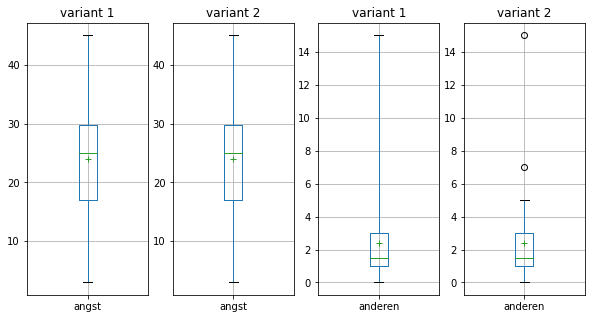

In [12]:
f, axs = plt.subplots(1, 4, figsize=(10, 5))
df.boxplot(ax=axs[0], column=['angst'], showmeans=True, meanprops=dict(marker='+'), whis=(0, 100)).set_title('variant 1')
df.boxplot(ax=axs[1], column=['angst'], showmeans=True, meanprops=dict(marker='+')).set_title('variant 2')
df.boxplot(ax=axs[2], column=['anderen'], showmeans=True, meanprops=dict(marker='+'), whis=(0, 100)).set_title('variant 1')
df.boxplot(ax=axs[3], column=['anderen'], showmeans=True, meanprops=dict(marker='+'), whis=1.5).set_title('variant 2')

# In de laatste grafiek gaat de bovenste whisker maar tot 5 i.p.v. 6 omdat waarde 6 niet voorkomt in de data.
# Dat is een regel die we in de les niet gezien hebben en die je mag negeren.

![xkcd-539](https://imgs.xkcd.com/comics/boyfriend.png)

> (p. 46) Oefening: Stel dat de temperatuur was gemeten in °F, welke transformatie moet dan gebruikt worden om de ruwe gegevens om te zetten in °C?

  - $X$: Celcius
  - $Y$: Fahrenheit
  - $Y = f(X)$
  - $y = f(x) = \frac{9}{5}x + 32$
  - $\iff x = f^{-1}(y) = \frac{5(y-32)}{9} = \frac{5}{9}y - \frac{160}{9}$

> (p. 47-48) Oefening:
> - (a) Een tikkende wekker produceert een geluid van 32. Welke fysieke geluidssterkte zal dan als tweemaal zo intens gepercipieerd worden?
> - (b) Het motorgeluid in een wagen komt overeen met 10 000. Welke fysieke geluidssterkte wordt dan als tweemaal zo intens gepercipieerd?
> - (c) Vergelijk de resultaten van (a) en (b). Wat kan je hieruit besluiten?

  - $X$: geluidsniveau in fysische wereld
  - $Y$: geluidsniveau in psychologische wereld
  - transformatie: $y = f(x) = \log_b x$
  - inverse transformatie: $x = f^{-1}(y) = b^y$
  - (a)
    - wekker: $x=32$
    - $y = \log_b 32$
    - dubbel zo luid (psychologisch): $2y = 2\log_b 32$
    - $x' = f^{-1}(2y) = b^{2y} = b^{2\log_b x} = b^{\log_b x^2} = x^2$
    - oplossing: $32^2 = 1024$
    - merk op: $b$ valt weg
      - basis van logaritme is irrelevant
      - typisch $b=10$
      - hier gemakkelijker uit te rekenen met $b=2$
  - (b)
    - wagen: $x = 10 000 = 10^4$
    - $x' = (10^4)^2 = 10^8$
  - (c)
    - verdubbeling in fysische wereld = kwadratering in psychologische wereld

> (p. 48) Oefening 1: Wat is in het geval van de neuroticismescores de betekenis van $Z(x_i) = 2, 0, -1.5, \ldots$?
> 
> (Hint: vertrek van bvb. $2 = Z(x_i) = \frac{x_i - \overline x}{s_x}$; werk dit vervolgens uit naar $x_i$.)

- $z_i = \frac{x_i - \bar x}{s_x} \iff x_i = \bar x + z_i s_x$
- $z_i = 0 \iff x_i = \bar x$ (observatie valt samen met gemiddelde)
- positieve Z-score: observatie ligt $z_i$ standaarddeviaties boven gemiddelde
- negatieve Z-score: observatie ligt $z_i$ standaarddeviaties onder gemiddelde

> (p. 48) Oefening 2: Stel dat je neuroticismescores hebt geregisteerd van 100 personen. Kan je iets zeggen over het aantal personen met een Z-score van -3 of kleiner?

  - voorbereiding: herschrijf ongelijkheid Tchebychev o.b.v. Z-score
    - $p(|X - \bar x| \geq ks_x) \leq \frac{1}{k^2}$
    - $\iff p(\frac{|X - \bar x|}{s_x} \geq k) \leq \frac{1}{k^2}$ (deel door $s_x > 0$)
    - $\iff p(\frac{|X - \bar x|}{|s_x|} \geq k) \leq \frac{1}{k^2}$ ($s_x > 0 \implies s_x = |s_x|$)
    - $\iff p(|\frac{X - \bar x}{s_x}| \geq k) \leq \frac{1}{k^2}$ (breng absolute waarde buiten breuk)
    - $\iff p(|Z_X| \geq k) \leq \frac{1}{k^2}$ (definitie Z-transformatie)
  - ter info: idem voor andere ongelijkheid
    - $p(Z_X^2 \geq k) \leq \frac{1}{k}$
  - dan
    - $n = 100$
    - $p(Z_X \leq -3)$
    - $= p(-Z_X \geq 3)$ (maal $-1$)
      - merk op: geldig voor $z_i = -3; -4; -5; ...$
    - $\leq p(|-Z_X| \geq 3)$
      - geldig voor meer scores nu: $z_i = ...;5;4;3;-3;-4;-5;...$
      - dus propertie wordt groter
    - $= p(|Z_X| \geq 3)$
    - $\leq \frac{1}{3^2} = \frac{1}{9} \approx 0.1111$ (Tchebychev met $k=3$)
    - conclusie: max 11.11% van de 100 (of dus max 11 personen) heeft een Z-score $z_i \leq -3$

> (p. 48) Oefening 3: Idem als in oefening 2. Kan je iets zeggen over het aantal personen met een Z-score tussen -2 en +2?

- $n = 100$
- $p(|Z_X| \geq 2) \leq \frac{1}{2^2} = \frac{1}{4} = 0.25$
  - max 25 personen buiten $[-2, 2]$
- $p(|Z_X| < 2) = 1 - p(|Z_X| \geq 2) = 1 - 0.25 = 0.75$
- conclusie: min 75 personen binnen $]-2, 2[$

> (p. 49) Oefening: Teken het lijndiagram voor de reactietijdgegevens van hierboven maar nu voor de log(reactietijden); teken ook een histogram voor een bijhorende gegroepeerde frequentiefunctie. Op welke manier en in welke mate lost de log-transformatie het uitbijtersprobleem op?

- zie grafieken hieronder
- vorm lijndiagram blijft identiek, maar afstand tussen x-waarden is niet meer gelijk
- zoveel te hoger de reactietijd, zoveel te sterker de compressiefactor van de log-transformatie
- uitbijters komen zo dichter bij de rest te liggen (niet zichtbaar in lijndiagram, wel in histogram)

In [13]:
data = 3*[100] + 8*[200] + 10*[300] + 7*[400] + 6*[500] + 5*[600] + 3*[700] + 2*[800] + [900] + 2*[1100] + [1200]
data = pd.DataFrame({'reactietijd': data})
data['log(reactietijd)'] = np.round(np.log10(data['reactietijd']), 4)
data.head(12)

,reactietijd,log(reactietijd)
0,100,2.0000
1,100,2.0000
2,100,2.0000
3,200,2.3010
4,200,2.3010
5,200,2.3010
6,200,2.3010
7,200,2.3010
8,200,2.3010
9,200,2.3010


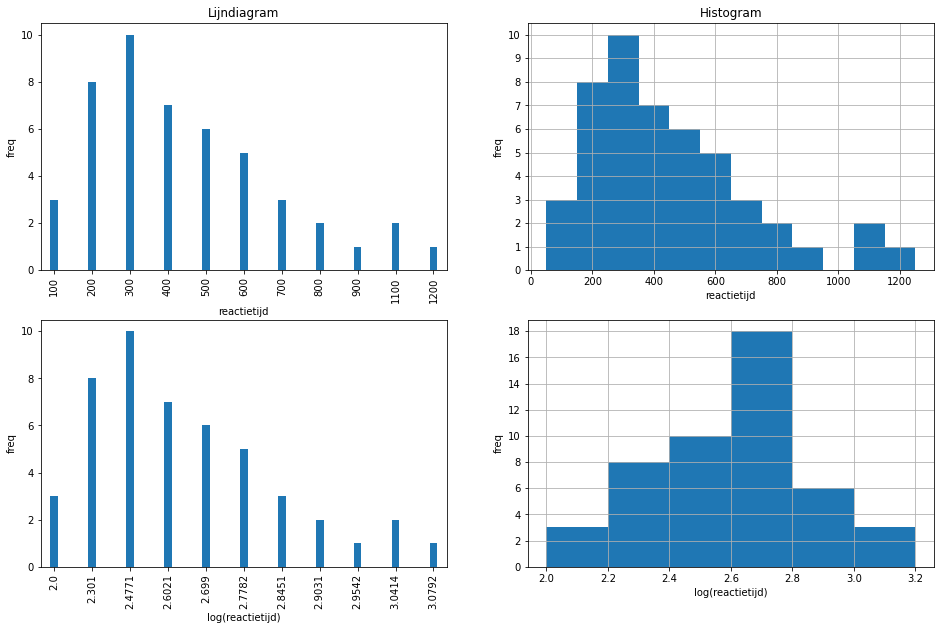

In [14]:
f, axs = plt.subplots(2, 2, figsize=(16, 10))
data['reactietijd'].value_counts().sort_index().plot(ax=axs[0,0], kind='bar', width=0.2)
data['reactietijd'].hist(ax=axs[0,1], bins=range(50, 1300, 100))
data['log(reactietijd)'].value_counts().sort_index().plot(ax=axs[1,0], kind='bar', width=0.2)
data['log(reactietijd)'].hist(ax=axs[1,1], bins=[2, 2.2, 2.4, 2.6, 2.8, 3, 3.2])
axs[0,0].set_xlabel('reactietijd')
axs[0,0].set_ylabel('freq')
axs[0,0].set_title('Lijndiagram')
axs[0,1].set_xlabel('reactietijd')
axs[0,1].set_ylabel('freq')
axs[0,1].set_yticks(range(0, 11))
axs[0,1].set_title('Histogram')
axs[1,0].set_xlabel('log(reactietijd)')
axs[1,0].set_ylabel('freq')
axs[1,1].set_xlabel('log(reactietijd)')
axs[1,1].set_ylabel('freq')
axs[1,1].set_yticks(range(0, 20, 2))

![xkcd-1162](https://imgs.xkcd.com/comics/log_scale.png)

> (p. 50) Noteer daarbij nog dat $f(x) = Z(x)$ een voorbeeld is van een lineaire transformatie; wat zijn in dit geval $a$ en $b$? (oefening)

  - $f(x) = Z(x) = \frac{x - \bar x}{s_x} = \frac{1}{s_x} x - \frac{\bar x}{s_x}$
  - $a = \frac{1}{s_x}$
  - $b = -\frac{\bar x}{s_x}$

> (p. 51) Oefening 1: Geef een voorbeeld van een transformatie $f$ waarvoor $f(x)_{0.25} \neq f(x_{0.25})$.

  - stel $X$ met
    - $n = 10$
    - $freq_X(0) = 4; p_X(0) = 0.4; F_X(0) = 0.4$
    - $freq_X(1) = 6; p_X(1) = 0.6; F_X(1) = 1.0$
  - $x_{0.25} = 0$
  - stel $Y = f(X) = -X$
  - $f(1) = -1 \implies freq_Y(-1) = 6; p_Y(-1) = 0.6; F_Y(-1) = 0.6$
  - $f(0) = -0 \implies freq_Y(-0) = 4; p_Y(-0) = 0.4; F_Y(-0) = 1.0$
  - $f(x_{0.25}) = f(0) = -0 = 0$
  - $f(x)_{0.25} = y_{0.25} = -1$
  - conclusie
    - $f$ flipt het teken, waardoor $F$ in de andere richting opgebouwd wordt en de kwantielen veranderen
  - alternatieven: $f(x) = |x|$ of $f(x) = x^2$ als $\exists x_i < 0$
  - werkt niet: $f(x) = \log x$ of $f(x) = ax+b$

> (p. 51) Oefening 2: Stel $Y = f(X)$, met $f(x) = \log(x)$; stel dat $x_0$ een modus is van $X$; weet je dan iets van de modi van $Y$?

  - $\log$ is een strikt monotoon stijgende functie en een bijectie
    - $a \leq b \implies \log a \leq \log b$
    - $a = b \implies \log a = \log b$
    - $a \neq b \implies \log a \neq \log b$
    - in tegenstelling tot bv. $|x|$ of $x^2$
      - $-2 \neq 2$ maar $|-2| = |2|$ en $(-2)^2 = 2^2$
  - hetzelfde geldt dan ook voor de frequenties voor/na transformatie
    - $freq_X(x_1) > freq_X(x_2) \implies freq_Y(\log x_1) > freq_Y(\log x_2)$
  - dus als $x_i$ een modus is van $X$, is $y_i = \log x_i$ een modus voor $Y$

> (p. 52) Bewijs: oefening

  - $\bar{Z_X}$
  - $= \frac{1}{n} \sum_i z_i$ (definitie gemiddelde)
  - $= \frac{1}{n} \sum_i \frac{x_i - \bar x}{s_x}$ (definitie Z-transformatie)
  - $= \frac{1}{ns_x} \sum_i (x_i - \bar x)$ (constante factor buiten)
  - $= \frac{1}{ns_x} (\sum_i x_i - \sum_i \bar x)$ (splits som)
  - $= \frac{1}{ns_x} (n \bar x - \sum_i \bar x)$ (definitie gemiddelde)
  - $= \frac{1}{ns_x} (n \bar x - \bar x \sum_i 1)$ (constante factor buiten)
  - $= \frac{1}{ns_x} (n \bar x - n \bar x)$ (want $\sum_i 1 = n$)
  - $= 0$

> (p. 52) Stel $Y=f(X)$, geldt dan altijd dat bereik $Y = f(\max_X) - f(\min_X)$? (Oefening).

- stel: observaties $x_1 = -5, x_2 = 4$
- $\min_X = -5$
- $\max_X = 4$
- bereik $X = 4 - (-5) = 11$
- stel $Y=X^2$
- $y_1 = (-5)^2 = 25, y_2 = 4^2 = 16$
- $\min_Y = 16$
- $\max_Y = 25$
- bereik $Y = 25 - 16 = 9$
- $f(\max_X) - f(\min_X) = f(4) - f(-5) = 16 - 25 = -9 \neq 9$
- conclusie: geldt niet altijd

> (p. 53) bewijs: oefening

  - $s_{Z_X}^2$
  - $= \frac{1}{n} \sum_i (z_i - \bar{z_i})^2$ (definitie variantie)
  - $= \frac{1}{n} \sum_i z_i^2$ ($\bar{z_i} = 0$, zie p. 52)
  - $= \frac{1}{n} \sum_i (\frac{x_i - \bar x}{s_x})^2$ (definitie Z-transformatie)
  - $= \frac{1}{n} \sum_i \frac{(x_i - \bar x)^2}{s_x^2}$ (kwadraat doorschuiven)
  - $= \frac{1}{s_x^2} \frac{1}{n} \sum_i (x_i - \bar x)^2$ (constante factor buiten)
  - $= \frac{1}{s_x^2} s_x^2$ (definitie variantie)
  - $= 1$

> (p. 53) bewijs: oefening

  - $Z_{aX+b}$
  - $=\frac{ax+b - \overline{ax+b}}{s_{ax+b}}$ (definitie Z-transformatie)
  - $=\frac{ax+b - (a\overline{x}+b)}{s_{ax+b}}$ (eigenschap gemiddelde)
  - $=\frac{ax - a\overline x}{s_{ax+b}}$ (schrap b)
  - $=\frac{ax - a\overline x}{|a|s_x}$ (eigenschap standaarddeviatie)
  - als $a > 0 \implies |a| = a$
    - $= \frac{x - \overline x}{s_x}$ (schrap a)
    - $= Z_X$ (definitie Z-transformatie)
  - als $a < 0 \implies |a| = -a$
    - $= \frac{x - \overline x}{-s_x}$ (schrap a)
    - $= -Z_X$ (definitie Z-transformatie)

### Bivariaat

> (p. 60) Oefeningen:
> - Bereken zelf voor hetzelfde voorbeeld de tabel van de kolomconditionele proporties. Zoek de betekenis van de getallen die je vindt en vergelijk die met de betekenis van de rijconditionele proporties.
> - Welke waarden verwacht je als marginale totalen voor rij- en kolomconditionele proporties en waarom? Controleer dit in de twee tabellen met conditionele proporties voor het voorbeeld 'plaats' en 'aantal anderen'.

- kolomconditionele proporties: zie tabel
- betekenis: bv. 57% van observaties thuis wanneer alleen
- cf. rijconditionele proporties: 27% alleen wanneer thuis
- kolomconditioneel -> som per kolom over rijen = 1
- rijconditioneel -> som per rij over kolommen = 1
- controle
  - bv. rijconditionele proporties (buitenshuis): $0.50 + 0.25 + 0.25 = 1$
  - bv. kolomconditionele proporties (3 anderen): $0.8 + 0.2 = 1$

In [15]:
# pd.crosstab(df['plaats'], df['anderen'], margins=True, normalize=True)
# pd.crosstab(df['plaats'], df['anderen'], normalize='index')
pd.crosstab(df['plaats'], df['anderen'], normalize='columns')

anderen,0,1,2,3,4,5,7,15
plaats,,,,,,,,
buitenshuis,0.2857,0.0000,0.0000,0.0000,0.0000,0.3333,0.0000,1.0000
thuis,0.5714,0.6250,0.5000,0.8000,0.0000,0.0000,0.0000,0.0000
werk,0.1429,0.3750,0.5000,0.2000,1.0000,0.6667,1.0000,0.0000


> (p. 62) Oefening: Zie jij in het scatterdiagram hierboven een samenhang tussen 'aantal anderen' en  'angst'? Zo ja, welke?

- meer anderen ~ gemiddeld meer angst


> (p. 65) Oefening: Stel dat men bij een groep kiezers naging voor welke partij ze bij de vorige en bij de huidige verkiezingen stemden. Wat is de betekenis van een overeenstemmingsproportie voor dergelijke gegevens?

- kiezerstrouw: percentage dat opnieuw voor zelfde partij heeft gestemd

> (p. 67) Oefeningen:
> - (1) Reken dit zelf na.
> - (2) Stel dat in het scatterdiagram van 'angst' versus 'aantal anderen' de meeste observaties in de kwadranten C en B zouden liggen:
>   - (a) wat zou dit inhoudelijk gezien betekenen?
>   - (b) welke waarde verwacht je dan voor $s_{xy}$?

  - (1)
    - $X$: aantal anderen
    - $Y$: angst
    - $\bar x = \frac{12}{5}$ (zie p. 40)
    - $\bar y = \frac{361}{15} \approx 24.0667$ (rekentoestel)
    - $\overline{x \cdot y} = \frac{1099}{15} \approx 73.2667$ (rekentoestel)
    - $s_{xy}$
    - $= \frac{1}{n} \sum_i (x_i - \bar x)(y_i - \bar y)$
    - $= \overline{x \cdot y} - \overline x \cdot \overline y$
    - $= \frac{1099}{15} - \frac{12}{5} \cdot \frac{361}{15}$
    - $= \frac{1163}{75}$
    - $\approx 15.5067$
  - (2)
    - negatief verband tussen aantal anderen en angst
    - (a) meer anderen ~ minder angst
    - (b) $s_{xy} < 0$

In [16]:
df2 = sdf.copy()
df2 = df2.drop('plaats', axis=1).rename(columns={"anderen": "X", "angst": "Y"})
x_gem = df2['X'].sum() / df2['X'].count()
y_gem = df2['Y'].sum() / df2['Y'].count()
df2['X - x̄'] = df2['X'] - x_gem
df2['Y - ȳ'] = df2['Y'] - y_gem
df2['(X - x̄)(Y - ȳ)'] = df2['X - x̄'] * df2['Y - ȳ']
df2['XY'] = df2['X'] * df2['Y']
df2['XY - x̄ȳ'] = df2['XY'] - x_gem * y_gem
df2.loc['gemiddelde'] = df2.values.sum(axis=0) / df2.count()
df2 = df2.style.applymap(lambda x: "background-color: yellow", subset=pd.IndexSlice['gemiddelde', '(X - x̄)(Y - ȳ)'])
df2 = df2.applymap(lambda x: "background-color: yellow", subset=pd.IndexSlice['gemiddelde', 'XY - x̄ȳ'])
df2

,X,Y,X - x̄,Y - ȳ,(X - x̄)(Y - ȳ),XY,XY - x̄ȳ
volgnummer,,,,,,,
1,3,16,3/5,-121/15,-121/25,48,-244/25
2,1,12,-7/5,-181/15,1267/75,12,-1144/25
3,5,32,13/5,119/15,1547/75,160,2556/25
4,0,24,-12/5,-1/15,4/25,0,-1444/25
5,1,15,-7/5,-136/15,952/75,15,-1069/25
6,0,15,-12/5,-136/15,544/25,0,-1444/25
7,2,29,-2/5,74/15,-148/75,58,6/25
8,3,3,3/5,-316/15,-316/25,9,-1219/25
9,7,36,23/5,179/15,4117/75,252,4856/25


> (p. 67) Uit deze definities kunnen de volgende eigenschappen worden afgeleid (bewijzen laten we steeds als oefening)

  - $s_{xy}$
  - $= \frac{1}{n} \sum_i (x_i - \bar x)(y_i - \bar y)$ (definitie)
  - $= \frac{1}{n} \sum_i (x_i y_i - x_i \bar y - y_i \bar x + \bar x \bar y)$ (distributief)
  - $= \frac{1}{n} \sum_i x_i y_i - \frac{1}{n} \sum_i x_i \bar y - \frac{1}{n} \sum_i y_i \bar x + \frac{1}{n} \sum_i \bar x \bar y$ (splits som)
  - $= \frac{1}{n} \sum_i x_i y_i - \frac{1}{n} \bar y \sum_i x_i - \frac{1}{n} \bar x \sum_i y_i + \bar x \bar y$ (constante factoren buiten)
  - $= \overline{x \cdot y} - \frac{1}{n} \bar y \sum_i x_i - \frac{1}{n} \bar x \sum_i y_i + \bar x \bar y$ (definitie gemiddelde)
  - $= \overline{x \cdot y} - \frac{1}{n} \bar y n \bar x - \frac{1}{n} \bar x n \bar y + \bar x \bar y$ (definitie gemiddelde)
  - $= \overline{x \cdot y} - \bar x \cdot \bar y$ (vereenvoudig)
  - de andere formules zijn identiek behalve met de gemiddeldes $\overline{(x - \bar x)(y - \bar y)}$ en $\overline{x \cdot y}$ vervangen voor een concrete formule o.b.v.
    - observaties
    - frequenties
    - proporties

> (p. 68) Er geldt dat: $\overline x = 2.7$ en $\overline y = 11.4$ (oefening).

  - marginale frequentiefuncties
    - $freq_X(x_j) = \sum_{j'} freq_{XY}(x_j, y_{j'})$
    - $freq_Y(y_{j'}) = \sum_j freq_{XY}(x_j, y_{j'})$
  - $n = 20$
  - $\bar x = \frac{1}{20} (2 \cdot 11 + 3 \cdot 4 + 4 \cdot 5) = 2.70$ (o.b.v. $freq_X$)
  - $\bar y = \frac{1}{20} (10 \cdot 7 + 11 \cdot 3 + 12 \cdot 5 + 13 \cdot 5) = 11.4$ (o.b.v. $freq_Y$)

| $X$ | $freq_X$ |
|-----|--------------------------------------------------|
| $2$ | $4+2+2+3=11$ |
| $3$ | $1+1+0+2=4$ |
| $4$ | $2+0+3+0=5$ |


| $Y$ | $freq_Y$ |
|-----|--------------------------------------------------|
| $10$ | $4+1+2=7$ |
| $11$ | $2+1+0=3$ |
| $12$ | $2+0+3=5$ |
| $13$ | $3+2+0=5$ |

> (p. 68) Belangrijke eigenschappen van covarianties (bewijs van de eerste twee: oefening)

- bewijs 1
  - $s_{xx}$
  - $= \frac{1}{n} \sum_i (x_i - \bar x)(x_i - \bar x)$ (definitie covariantie)
  - $= \frac{1}{n} \sum_i (x_i - \bar x)^2$
  - $= s_x^2$ (definitie variantie)
- bewijs 2
  - $s_{xy}$
  - $= \frac{1}{n} \sum_i (x_i - \bar x)(y_i - \bar y)$ (definitie covariantie)
  - $= \frac{1}{n} \sum_i (y_i - \bar y)(x_i - \bar x)$ (commutativiteit product)
  - $= s_{yx}$ (definitie covariantie)

> (p. 68) Oefening: Stel dat voor een aantal echtparen de lengte van de man ($X$) en de vrouw ($Y$) in meter werd nagegaan, en dat $s_{xy} = 3$. Stel dat we de lengte van de man in cm uitdrukken, waaraan wordt de covariantie dan gelijk? Stel dat we hetzelfde ook doen voor de lengte van de vrouw, wat wordt de covariantie dan?

  - $s_{xy} = 3$
  - $X' = 100X$
  - $s_{x'\,y} = s_{100x\,y} = 100s_{xy} = 300$
  - $Y' = 100Y$
  - $s_{x'\,y'} = s_{100x\,100y} = 100s_{x\,100y} = 100s_{100y\,x} = 10 000s_{yx} = 10 000s_{xy} = 30 000$

> (p. 69) Oefeningen:
> - 1. Reken deze waarde zelf na:
>   - (a) met de formule uit de definitie
>   - (b) via de twee formules uit de eigenschap hieronder
>   - (c) via de correlatiefunctie op je rekenmachine.
> - 2. Bereken ook de correlatie tussen 2 kwantitatieve variabelen voor je eigen gegevens.

  - (1a)
    - $X$: aantal anderen
    - $Y$: angst
    - $r_{xy}$
    - $= s_{Z_X Z_Y}$
    - $= \overline{Z_X \cdot Z_Y} - \overline{Z_X} \cdot \overline{Z_Y}$
    - $= \overline{Z_X \cdot Z_Y}$
    - zet $X$ in `L1` op rekentoestel
    - `1-Var Stats`: `L1`, `ONE`
      - $\bar x = 2.4$
      - $s_x \approx 2.9507$
    - bereken $Z_X$: `L2=(L1-x̄)/σx`
    - zet $Y$ in `L1` op rekentoestel
    - `1-Var Stats`: `L1`, `ONE`
      - $\bar y \approx 24.0667$
      - $s_y \approx 9.2554$
    - bereken $Z_Y$: `L3=(L1-x̄)/σx`
    - bereken $Z_X \cdot Z_Y$: `L1=L2*L3`
    - `1-Var Stats`: `L1`, `ONE`
      - $\overline{Z_X \cdot Z_Y} \approx 0.5678$
  - (1b)
    - $s_x = \sqrt{\frac{1306}{150}} \approx 2.9507$ (zie p. 40)
    - $s_y \approx 9.2554$ (rekentoestel)
    - $s_{xy} \approx 15.5$ (zie p. 66)
    - $r_{xy}$
    - $= \frac{s_{xy}}{s_x s_y}$
    - $= \frac{15.5}{2.9507 \cdot 9.2554}$
    = $\approx 0.5676$
  - (1c) $r_{xy} \approx 0.5678$ (rekentoestel)
  - (2) N/A

In [17]:
df2 = sdf.copy()
df2 = df2.drop('plaats', axis=1).rename(columns={"anderen": "X", "angst": "Y"})
x_gem = df2['X'].sum() / df2['X'].count()
y_gem = df2['Y'].sum() / df2['Y'].count()
df2['X - x̄'] = df2['X'] - x_gem
df2['Y - ȳ'] = df2['Y'] - y_gem

x_var = (df2['X - x̄'] ** 2).sum() / df2['X - x̄'].count()
y_var = (df2['Y - ȳ'] ** 2).sum() / df2['Y - ȳ'].count()
x_std = sy.sqrt(x_var)
y_std = sy.sqrt(y_var)

df2['ZX'] = (df2['X - x̄'] / x_std).astype(np.float)
df2['ZY'] = (df2['Y - ȳ'] / y_std).astype(np.float)
df2['ZX∙ZY'] = df2['ZX'] * df2['ZY']

df2.loc['gemiddelde'] = df2.values.sum(axis=0) / df2.count()
df2 = df2.style.applymap(lambda x: "background-color: yellow", subset=pd.IndexSlice['gemiddelde', 'ZX∙ZY'])
df2

,X,Y,X - x̄,Y - ȳ,ZX,ZY,ZX∙ZY
volgnummer,,,,,,,
1,3,16,3/5,-121/15,0.203341,-0.871564,-0.177225
2,1,12,-7/5,-181/15,-0.474463,-1.303745,0.618578
3,5,32,13/5,119/15,0.881145,0.857158,0.755281
4,0,24,-12/5,-1/15,-0.813365,-0.007203,0.005859
5,1,15,-7/5,-136/15,-0.474463,-0.979609,0.464788
6,0,15,-12/5,-136/15,-0.813365,-0.979609,0.796780
7,2,29,-2/5,74/15,-0.135561,0.533023,-0.072257
8,3,3,3/5,-316/15,0.203341,-2.276151,-0.462835
9,7,36,23/5,179/15,1.558949,1.289339,2.010014


In [18]:
df['anderen'].corr(df['angst'])

0.5678031847719645

> (p. 70) Bewijs van al deze eigenschappen: oefening

  - (1)
    - $r_{xy}$
    - $= s_{Z_X Z_Y}$ (definitie correlatie)
    - $= \frac{1}{n} \sum_i (Z_X(x_i) - \overline{Z_X})(Z_Y(y_i) - \overline{Z_Y})$ (definitie covariantie)
    - $= \frac{1}{n} \sum_i Z_X(x_i) Z_Y(y_i)$ ($\overline{Z_X} = \overline{Z_Y} = 0$)
    - $= \frac{1}{n} \sum_i \frac{x_i - \bar x}{s_x} \frac{y_i - \bar y}{s_y}$ (definitie Z-transformatie)
    - $= \frac{1}{s_x s_y} \frac{1}{n} \sum_i (x_i - \bar x)(y_i - \bar y)$ (constante factoren buiten)
    - $= \frac{s_{xy}}{s_x s_y}$ (definitie covariantie)
  - (2)
    - $r_{xx}$
    - $= \frac{s_{xx}}{s_x s_x}$ (eigenschap correlatie)
    - $= \frac{s_x^2}{s_x s_x}$ (eigenschap covariantie)
    - $= 1$ (schrappen)
  - (3)
    - $r_{xy}$
    - $= \frac{s_{xy}}{s_x s_y}$ (eigenschap correlatie)
    - $= \frac{s_{yx}}{s_x s_y}$ (eigenschap covariantie)
    - $= \frac{s_{yx}}{s_y s_x}$ (commutativiteit product)
    - $= r_{yx}$ (definitie correlatie)
  - (4)
    - $r_{ax+b\,y}$
    - $= \frac{s_{ax+b\,y}}{s_{ax+b} s_y}$ (eigenschap correlatie)
    - $= \frac{as_{xy}}{s_{ax+b} s_y}$ (eigenschap covariantie)
    - $= \frac{as_{xy}}{|a|s_x s_y}$ (eigenschap standaarddeviatie)
    - stel $a > 0 \implies |a| = a$
      - $= \frac{s_{xy}}{s_x s_y}$ (schrap $a$)
      - $= r_{xy}$ (eigenschap correlatie)
    - stel $a < 0 \implies |a| = -a$
      - $= \frac{s_{xy}}{-s_x s_y}$ (schrap $a$)
      - $= -r_{xy}$ (eigenschap correlatie)

> (p. 71) Bewijs: oefening

- $-1 \leq r_{xy} \leq 1$ (eigenschap correlatie)
- $\iff -1 \leq \frac{s_{xy}}{s_x s_y} \leq 1$ (eigenschap correlatie)
- $\iff -s_x s_y \leq s_{xy} \leq s_x s_y$ (vermenigvuldig met $s_x s_y > 0$)

> (p. 71) Bewijs: We beperken ons tot '$\implies$' in (a); de rest laten we als oefening.
>
> Er kan dan aangetoond worden (oefening!) dat:

- (a) $\implies$
    - $\sum_i [Z_X(x_i) \pm Z_Y(y_i)]^2$
    - $= \sum_i [Z_X(x_i)^2 \pm 2Z_X(x_i)Z_Y(y_i) + Z_Y(y_i)^2]$ (merkwaardig product)
    - $= \sum_i Z_X(x_i)^2 \pm 2 \sum_i Z_X(x_i)Z_Y(y_i) + \sum_i Z_Y(y_i)^2$ (splits som)
    - $= n \pm 2 \sum_i Z_X(x_i)Z_Y(y_i) + n$ (want $\sum_i Z_X(x_i)^2 = n$)
    - $= 2n \pm 2nr_{xy}$ (eigenschap correlatie)
    - $= 2n(1 \pm r_{xy})$
    - $= 0 \iff r_{xy} = \mp 1$ (met $n \neq 0$)
- (a) $\impliedby$
    - alle stappen uit $\implies$ gelden ook in de andere richting
- (b) $\iff$
    - $r_{xy} = -1$
    - $\iff \sum_i [Z_X(x_i) + Z_Y(y_i)]^2 = 0$ (zie a)
    - $\iff \forall i: Z_X(x_i) = -Z_Y(y_i)$

> (p. 71) Ga na wat er gebeurt als $\forall i: Z_X(x_i) = -Z_Y(y_i)$

  - $\forall i: Z_X(x_i) = -Z_Y(y_i)$
  - $\iff \forall i: \frac{y_i - \bar y}{s_y} = -\frac{x_i - \bar x}{s_x}$
  - $\iff \forall i: y_i = \left(\bar y + \frac{s_y}{s_x} \bar x\right) - \frac{s_y}{s_x} x_i$

> (p. 80) Oefening: Bereken in het voorbeeld van Anna F. de proportie van de variantie van angst die met optimale lineaire voorspelling verklaard wordt door het aantal aanwezige anderen.

  - gegeven
    - $X$: aantal anderen
    - $Y$: angstscore
    - $r_{xy} = 0.57$
    - $Y = f(X) = b_0 + b_1X$
  - gevraagd
    - proportie verklaarde variantie
    - $\frac{s_{verkl}^2}{s_y^2} = r_{xy}^2$
  - oplossing
    - $r_{xy}^2= 0.57^2 = 0.3249$
  - conclusie
    - ~32% van variantie in angst wordt verklaard door aantal anderen

> (p. 85) Oefening 1: Bereken opnieuw de regressievergelijking voor 'aantal anderen' en 'angst' maar nu met weglating van de uitbijter. Teken ook de bijhorende regressielijn.

  - gegeven
    - dataset appendix 3A zonder observatie 13
    - $X$: aantal anderen
    - $Y$: angstscore
    - $n = 29$
  - gevraagd
    - $Y = f(X) = b_0 + b_1X$
    - $b_0$
    - $b_1$
  - oplossing
    - rekentoestel
      - $\bar x \approx 1.9655$
      - $\bar y \approx 23.3448$
      - $\overline{x \cdot y} \approx 52.5172$
      - $s_x \approx 1.8286$
      - $s_y \approx 8.5431$
    - $s_{xy} = \overline{x \cdot y} - \bar x \cdot \bar y \approx 52.5172 - 1.9655 \cdot 23.3448 \approx 6.6326$
    - $r_{xy} = \frac{s_{xy}}{s_x s_y} \approx \frac{6.6326}{1.8286 \cdot 8.5431} \approx 0.4246$
      - of $r$ via rekentoestel
    - $b_1 = r_{xy} \frac{s_y}{s_x} \approx 0.4246 \frac{8.5431}{1.8286} \approx 1.9836$
      - of $a$ via rekentoestel
    - $b_0 = \bar y - b_1 \bar x \approx 23.3448 - 1.9836 \cdot 1.9655 \approx 19.4459$
      - of $b$ via rekentoestel
  - conclusie
    - $y_i^{est} = 19.4459 + 1.9836x_i$

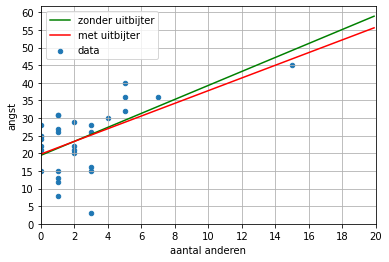

In [19]:
x = np.arange(0, 20, 0.1)
y = 19.4459 + 1.9836*x
y_orig = 19.8 + 1.8*x

fig, ax = plt.subplots()
df.plot(ax=ax, x='anderen', y='angst', kind='scatter')
ax.plot(x, y, 'g')
ax.plot(x, y_orig, 'r')
ax.set(xlabel='aantal anderen', ylabel='angst', xlim=[0,20], xticks=range(0,21, 2), yticks=range(0, 65, 5))
ax.grid()
plt.legend(['zonder uitbijter', 'met uitbijter', 'data'])

![xkcd-2048](https://imgs.xkcd.com/comics/curve_fitting.png)

> (p. 85) Oefening 2: Stel dat de correlatie tussen 'aantal anderen' en 'angst' -0.60 was, wat zou dit psychologisch gezien dan betekenen? Geef verschillende mogelijke causale verbanden die achter een dergelijke correlatie kunnen schuilgaan.

  - stel $r_{xy} = -0.60$
  - negatief verband: meer anderen ~ minder angst
  - hypotheses
    - direct verband: sociaal persoon die niet graag alleen is
    - mediator variabele: meer anderen -> hulp aanwezig indien nodig -> minder angst
    - derde variabele: feestje met drank -> meer anderen + minder angst

> (p. 85) Oefening 3: Stel dat $s_x^2 \neq 0 \neq s_y^2$ en dat we zowel een optimale voorspelling als een optimale lineaire voorspelling van $Y$ op basis van $X$ maken. Noteren we $s_{y.x}^2$ bij optimale voorspelling als $A$ en $s_{y.x}^2$ bij optimale lineaire voorspelling als $B$. We beschouwen verder 3 mogelijke waarden voor $A$ ($0$, tussenin, $s_{y.x}^2$) en idem voor $B$. Dit levert $3 \times 3 = 9$ combinaties van waarden voor $A$ en $B$. Teken voor elk van de combinaties die mogelijk zijn een toepasselijk scatterdiagram met daarin de twee voorspellingsfuncties. Geef voor de combinaties die niet mogelijk zijn aan waarom ze niet kunnen.

  - $s_y^2 = s_{verkl}^2 + s_{y.x}^2$
  - $s_{verkl}^2 = \overline{(y_i^{est} - \bar y)^2}$
  - $s_{y.x}^2 = \overline{(y_i^{est} - y_i)^2}$
  - $A = s_{y.x}^2$ bij algemene optimale voorspelling
    - $A = 0$
      - $\implies \overline{(y_i^{est} - y_i)^2} = 0$
      - $\implies \forall (x_i, y_i): y_i^{est}(x_i) = \overline{y \mid X=x_i} = y_i$
      - dus voorspelling moet perfect zijn
      - bv. door max 1 observatie per $x_j$ te nemen
    - tussenin
    - $A = s_y^2$
      - $\implies s_{verkl}^2 = \overline{(y_i^{est} - \bar y)^2} = 0$
      - $\implies \forall i: y_i^{est} = \bar y$
      - dus $y_i^{est}$ verandert niet in functie van $x_j$
      - dus voorspelling is constante, horizontale lijn
  - $B = s_{y.x}^2$ bij optimale lineaire voorspelling
    - $B = 0$
      - $\implies y_i^{est}(x_j) = b_0 + b_1 x_j = y_i$
      - dus er moet een perfect lineair verband zijn
      - equivalent
        - $s_y^2 = s_{verkl}^2$
        - $r_{xy}^2 = 1$
        - $r_{xy} = \pm 1$
    - tussenin
    - $B = s_y^2$
      - $\implies s_{verkl}^2 = \overline{(y_i^{est} - \bar y)^2} = 0$
      - $\implies \forall i: y_i^{est} = \bar y$
      - dus $y_i^{est}$ verandert niet in functie van $x_j$
      - dus voorspelling is constante, horizontale lijn
      - equivalent
        - $r_{xy}^2 = 0$
        - $r_{xy} = 0$
        - $b_1 = 0$
  - $A \leq B$ want algemene optimale voorspelling zorgt voor kleinst mogelijke $s_{y.x}^2$

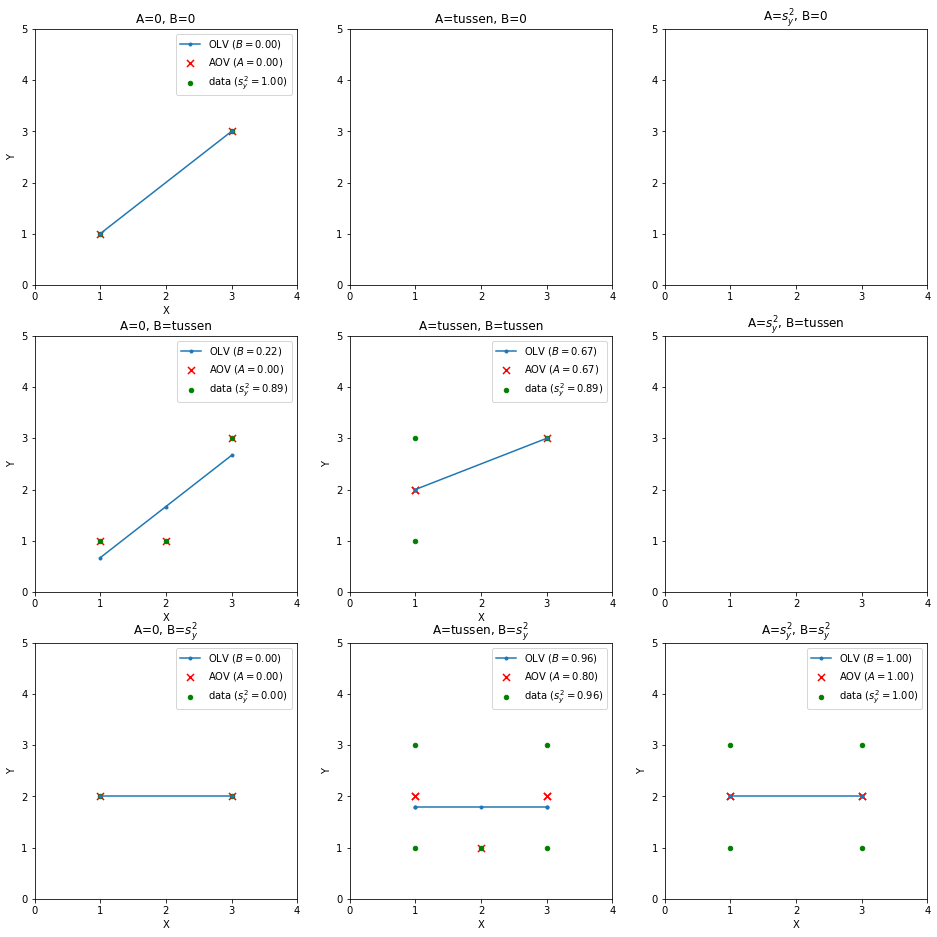

In [219]:
def maak_grafiek(df, ax):
    data = df.copy()

    # OLV
    r_xy = np.nan_to_num(data['X'].corr(data['Y']), nan=0)
    x_gem = data['X'].mean()
    y_gem = data['Y'].mean()
    s_x = data['X'].std(ddof=0)
    s_y = data['Y'].std(ddof=0)
    s_y2 = data['Y'].var(ddof=0)
    b_1 = s_y * r_xy / s_x
    b_0 = y_gem - b_1 * x_gem
    data['Y_est_olv'] = b_0 + b_1 * data['X']
    data['B'] = (data['Y'] - data['Y_est_olv']) ** 2
    B = data['B'].mean()

    # AOV
    grouped = df.groupby('X').mean().rename(columns={'Y': 'Y_est_aov'})
    data = pd.merge(grouped, data, on=['X'], how='inner')
    A = ((data['Y'] - data['Y_est_aov']) ** 2).mean()
    
    # plot
    data.plot.scatter(x='X', y='Y_est_aov', c='red', marker='x', s=50, ax=ax)
    data.plot(x='X', y='Y_est_olv', marker='.', ax=ax)
    data.plot.scatter(x='X', y='Y', c='green', ax=ax)
    ax.legend([
        f'OLV ($B={B:.2f}$)', 
        f'AOV ($A={A:.2f}$)', 
        f'data ($s_y^2={s_y2:.2f}$)'
    ])

fig, axs = plt.subplots(3,3, figsize=(16, 16))
plt.setp(axs, xlim=[0,4], ylim=[0,5], xticks=range(5))
axs[0,0].set_title('A=0, B=0')
axs[0,1].set_title('A=tussen, B=0')
axs[0,2].set_title('A=$s_y^2$, B=0')

axs[1,0].set_title('A=0, B=tussen')
axs[1,1].set_title('A=tussen, B=tussen')
axs[1,2].set_title('A=$s_y^2$, B=tussen')

axs[2,0].set_title('A=0, B=$s_y^2$')
axs[2,1].set_title('A=tussen, B=$s_y^2$')
axs[2,2].set_title('A=$s_y^2$, B=$s_y^2$')

data = pd.DataFrame([(1,1), (3,3)], columns=['X', 'Y'])
maak_grafiek(data, axs[0,0])

data = pd.DataFrame([(1,1), (2,1), (3,3)], columns=['X', 'Y'])
maak_grafiek(data, axs[1,0])

data = pd.DataFrame([(1,1), (1,3), (3,3)], columns=['X', 'Y'])
maak_grafiek(data, axs[1,1])

data = pd.DataFrame([(1,2), (3,2)], columns=['X', 'Y'])
maak_grafiek(data, axs[2,0])

data = pd.DataFrame([(1,1), (1,3), (2,1), (3,1), (3,3)], columns=['X', 'Y'])
maak_grafiek(data, axs[2,1])

data = pd.DataFrame([(1,1), (1,3), (3,1), (3,3)], columns=['X', 'Y'])
maak_grafiek(data, axs[2,2])

![xkcd-833](https://imgs.xkcd.com/comics/convincing.png)

> (p. 88) Vraag: Verwacht je een positief of negatief verband tussen deze deelproeven? Waarom?

  - hypothese 1: IQ bepaalt score op taal + wiskunde
    - dus positief verband
  - hypothese 2: studenten kiezen voor talenrichtingen omdat ze slecht zijn in wiskunde en andersom
    - dus negatief verband

> (p. 89) Oefening: Waaraan is $s_{x-y}^2$ gelijk? Bewijs!

  - vervang waar nodig + door - in gegeven bewijs
  - resultaat: $s_{x-y}^2 = s_x^2 + s_y^2 - 2s_{xy}$
  - alternatief bewijs
    - stel $U = -Y$
    - $s_{x-y}^2$
    - $= s_{x+u}^2$ (substitutie)
    - $= s_x^2 + s_u^2 + 2s_{xu}$ (eigenschap variantie)
    - $= s_x^2 + s_{-y}^2 + 2s_{x\;-y}$ (substitutie)
    - $= s_x^2 + (-1)^2 s_{y}^2 + 2s_{x\;-y}$ (eigenschap variantie)
    - $= s_x^2 + s_{y}^2 + 2s_{x\;-y}$ (vereenvoudig)
    - $= s_x^2 + s_{y}^2 + (-1) \cdot 2s_{xy}$ (eigenschap covariantie)
    - $= s_x^2 + s_{y}^2 - 2s_{xy}$ (vereenvoudig)

> (p. 89) Oefening: waaraan is $r_{x+y\;z}$ dan wel gelijk?

  - $r_{x+y\,z}$
  - $= \dfrac{s_{x+y\,z}}{s_{x+y} s_z}$ (eigenschap correlatie)
  - $= \dfrac{s_{xz} + s_{yz}}{s_{x+y} s_z}$ (eigenschap covariantie)
  - $= \dfrac{s_{xz} + s_{yz}}{\sqrt{s_x^2 + s_y^2 + 2s_{xy}}s_z}$ (eigenschap variantie)

> (p. 90-91) Oefeningen:

  - $\overline{4v+6w-x+5} = 4\bar v + 6\bar w - \bar x + 5$
  - $s_{v-w+2x}$
    - $=\sqrt{s_{v-w+2x}^2}$
    - $=\sqrt{s_v^2 - s_{vw} + 2s_{vx} - s_{wv} + s_w^2 - 2s_{wx} + 2s_{xv} - 2s_{xw} + 4s_x^2}$
    - $=\sqrt{s_v^2 + s_w^2 + 4s_x^2 - 2s_{vw} + 4s_{vx} - 4s_{wx}}$
  - $s_{3x+4y\; 6v+4w}$
    - $18s_{xv} + 12s_{xw} + 24s_{yv} + 16s_{yw}$
  - $s_{3x+4y+2\; 6v+4w}$
    - idem als vorige, $+2$ heeft geen effect

> (p. 91) Bewijs de gelijkheden in de drie kadertjes voor enkele kleine sommen, met concrete waarden voor de $a$'s en de $b$'s, zoals in het voorbeeld en de oefeningen hierboven.

  - gemiddelde $\overline{ax + by + cz}$
    - $= \frac{1}{n} \sum_i (ax_i + by_i + cz_i)$ (definitie gemiddelde)
    - $= \frac{1}{n} \sum_i ax_i + \frac{1}{n} \sum_i by_i + \frac{1}{n} \sum_i cz_i$ (splits som)
    - $= a\frac{1}{n} \sum_i x_i + b\frac{1}{n} \sum_i y_i + c\frac{1}{n} \sum_i z_i$ (constante factoren buiten)
    - $= a\bar x + b\bar y + c\bar z$ (definitie gemiddelde)
  - covariantie: $s_{ax+by\;cv+dw}$
    - $\overline{(ax+by) \cdot (cv+dw)} - \overline{ax+by} \cdot \overline{cv+dw}$ (chiastische eigenschap)
    - $\overline{(ax+by) \cdot (cv+dw)} - (a\bar x + b\bar y) \cdot (c\bar v + d\bar w)$ (zie bewijs gemiddelde)
    - $\overline{acxv + adxw + bcyv + dwyw} - (a\bar x + b\bar y) \cdot (c\bar v + d\bar w)$ (distributiviteit)
    - $ac\overline{xv} + ad\overline{xw} + bc\overline{yv} + bd\overline{yw} - (a\bar x + b\bar y) \cdot (c\bar v + d\bar w)$ (zie bewijs gemiddelde)
    - $ac\overline{xv} + ad\overline{xw} + bc\overline{yv} + bd\overline{yw} - ac\bar x\bar v - ad\bar x\bar w - bc\bar y\bar v - bd\bar y \bar w$ (distributiviteit)
    - $=ac(\overline{xv} - \bar x \bar v) + ad(\overline{xw} - \bar x \bar w) + bc(\overline{yv} - \bar y \bar v) + bd(\overline{yw} - \bar y \bar w)$ (herschikken)
    - $=acs_{xv} + ads_{xw} + bcs_{yv} + bds_{yw}$ (chiastische eigenschap)
  - variantie: $s_{ax+by}^2$
    - $s_{ax+by}^2$
    - $= s_{ax+by\;ax+by}$ (eigenschap variantie)
    - $= aas_{xx} + abs_{xy} + bas_{yx} + bbs_{yy}$ (zie bewijs covariantie)
    - $= a^2s_x^2 + b^2s_y^2 + 2abs_{xy}$ (herschikken + $s_{xx} = s_x^2$)

### Multivariaat

> (p. 102) Oefening 1. Welke effecten zijn in de onderstaande tabel aanwezig?

  - HE $X_1$: ja, gemiddeldes verschillen ($4.75 \neq 6.25$) naargelang waarde $X_1$
  - HE $X_2$: nee, gemiddelde is altijd $5.50$, onafhankelijk van waarde $X_2$
  - interactie: nee, geen verschil tussen celgemiddelden in rijen/kolommen

> (p. 102) Oefening 2. Welke effecten zijn in de onderstaande figuur aanwezig? (Probeer deze vraag volledig grafisch te beantwoorden zonder de figuur eerst in een tabel om te zetten.)

  - HE $X_1$: nee, uitgemiddeld over $X_2$ heeft $X_1$ geen effect
  - HE $X_2$: ja, uitgemiddeld over $X_1$ is er nog een stijging
  - interactie: ja, lijnen niet evenwijdig